In [ ]:
import pandas as pd
url = 'https://drive.google.com/file/d/18xEB6MllkwZ_pU42dt14j73Pgp3NIKLQ/view'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url, index_col=0)
print(data)

                           Specific Bean Origin\nor Bar Name   REF  \
Company \n(Maker-if known)                                           
A. Morin                                         Agua Grande  1876   
A. Morin                                               Kpime  1676   
A. Morin                                              Atsane  1676   
A. Morin                                               Akata  1680   
A. Morin                                              Quilla  1704   
...                                                      ...   ...   
Zotter                                                  Peru   647   
Zotter                                                 Congo   749   
Zotter                                          Kerala State   749   
Zotter                                          Kerala State   781   
Zotter                                    Brazil, Mitzi Blue   486   

                            Review\nDate Cocoa\nPercent Company\nLocation  \
Company \n(M

Задание 1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1795 entries, A. Morin to Zotter
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Specific Bean Origin
or Bar Name  1795 non-null   object 
 1   REF                               1795 non-null   int64  
 2   Review
Date                       1795 non-null   int64  
 3   Cocoa
Percent                     1795 non-null   object 
 4   Company
Location                  1795 non-null   object 
 5   Rating                            1795 non-null   float64
 6   Bean
Type                         1794 non-null   object 
 7   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 126.2+ KB


In [ ]:
# 1 Количество строк и столбцов
num_rows, num_columns = data.shape
print(f"Количество строк: {num_rows}, Количество столбцов: {num_columns}")

# 2 Первые 5 строк
print("Первые 5 строк:")
print(data.head())

# 3 Последние 5 строк
print("Последние 5 строк:")
print(data.tail())

# 4 Количество категориальных и числовых признаков
num_categorical = data.select_dtypes(include=['object','category']).shape[1]  # 1 - кол-во столбцов
num_numerical = data.select_dtypes(include=['number']).shape[1]
print(f"Количество категориальных признаков: {num_categorical}, Количество числовых признаков: {num_numerical}")

# 5 Размер датафрейма в МБ
memory_usage_mb = data.memory_usage(deep=True).sum() / (1024 ** 2)   # deep=Trure для учета длины строк в типе object, далее суммирование и деление для получения МБ
print(f"Размер датафрейма: {memory_usage_mb:.2f} МБ")

Количество строк: 1795, Количество столбцов: 8
Первые 5 строк:
                           Specific Bean Origin\nor Bar Name   REF  \
Company \n(Maker-if known)                                           
A. Morin                                         Agua Grande  1876   
A. Morin                                               Kpime  1676   
A. Morin                                              Atsane  1676   
A. Morin                                               Akata  1680   
A. Morin                                              Quilla  1704   

                            Review\nDate Cocoa\nPercent Company\nLocation  \
Company \n(Maker-if known)                                                  
A. Morin                            2016            63%            France   
A. Morin                            2015            70%            France   
A. Morin                            2015            70%            France   
A. Morin                            2015            70%      

Задание 2

In [ ]:
# Функция для вычисления статистик для числовых переменных
def statistics(data):
    numeric_columns = data.select_dtypes(include=['number']).columns
    stats = {}

    for column in numeric_columns:

        missing = data[column].isnull().mean()
        max = data[column].max()
        min = data[column].min()
        mean = data[column].mean()
        median = data[column].median()
        variance = data[column].var()
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower) | (data[column] > upper)]

        stats[column] = {
            'Доля пропусков': round(missing, 2),
            'Максимальное значение': round(max, 2),
            'Минимальное значение': round(min, 2),
            'Среднее значение': round(mean, 2),
            'Медиана': round(median, 2),
            'Дисперсия': round(variance, 2),
            'IQR': round(IQR, 2),
            'Количество выбросов': outliers.shape[0]  # 0 - кол-во строк
        }

    return stats

statistics = statistics(data)

for column, stat in statistics.items():
    print(f"\nСтатистика для переменной '{column}':")
    for key, value in stat.items():
        print(f"{key}: {value}")


Статистика для переменной 'REF':
Доля пропусков: 0.0
Максимальное значение: 1952
Минимальное значение: 5
Среднее значение: 1035.9
Медиана: 1069.0
Дисперсия: 305683.33
IQR: 926.0
Количество выбросов: 0

Статистика для переменной 'Review
Date':
Доля пропусков: 0.0
Максимальное значение: 2017
Минимальное значение: 2006
Среднее значение: 2012.33
Медиана: 2013.0
Дисперсия: 8.57
IQR: 5.0
Количество выбросов: 0

Статистика для переменной 'Rating':
Доля пропусков: 0.0
Максимальное значение: 5.0
Минимальное значение: 1.0
Среднее значение: 3.19
Медиана: 3.25
Дисперсия: 0.23
IQR: 0.62
Количество выбросов: 19


In [ ]:
# Функция для вычисления статистик для категориальных переменных
def categorical_statistics(data):
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns
    stats = {}

    for column in categorical_columns:
        missing = data[column].isnull().sum()
        missing_1 = data[column].isnull().mean()
        unique = data[column].nunique()


        value_counts = data[column].value_counts()

        # Редкие категории < 5% от всех данных,
        threshold = 0.05 * len(data)
        outliers = list(value_counts[value_counts < threshold].index)
        one_outlier = outliers[0] if outliers else "Нет выбросов"

        stats[column] = {
            'Кол-во пропусков': round(missing, 2),
            'Доля пропусков': round(missing_1, 2),
            'Количество уникальных значений': unique,
            'Наиболее редкие категории': one_outlier
        }

    return stats

statistics_result = categorical_statistics(data)
for column, stat in statistics_result.items():
    print(f"\nСтатистика для переменной '{column}':")
    for key, value in stat.items():
        print(f"{key}: {value}")


Статистика для переменной 'Specific Bean Origin
or Bar Name':
Кол-во пропусков: 0
Доля пропусков: 0.0
Количество уникальных значений: 1039
Наиболее редкие категории: Madagascar

Статистика для переменной 'Cocoa
Percent':
Кол-во пропусков: 0
Доля пропусков: 0.0
Количество уникальных значений: 45
Наиболее редкие категории: 65%

Статистика для переменной 'Company
Location':
Кол-во пропусков: 0
Доля пропусков: 0.0
Количество уникальных значений: 60
Наиболее редкие категории: Italy

Статистика для переменной 'Bean
Type':
Кол-во пропусков: 1
Доля пропусков: 0.0
Количество уникальных значений: 41
Наиболее редкие категории: Forastero

Статистика для переменной 'Broad Bean
Origin':
Кол-во пропусков: 1
Доля пропусков: 0.0
Количество уникальных значений: 100
Наиболее редкие категории:  


Задача 3

In [ ]:
import plotly.express as px
#
country_ratings = data.groupby("Company\nLocation")["Rating"].mean().reset_index()

# Отбираем топ-15 стран с наивысшим средним рейтингом
top_countries = country_ratings.nlargest(15, "Rating")

# Строим столбчатую диаграмму
fig = px.bar(top_countries, x="Company\nLocation", y="Rating",
             title="Средний рейтинг шоколада по странам-производителям",
             labels={"Company_Location": "Страна", "Rating": "Средний рейтинг"},
             template="plotly_dark", color="Rating", color_continuous_scale="viridis")

fig.show()

highest_rated_country = top_countries.iloc[0]
lowest_rated_country = top_countries.iloc[-1]

print(highest_rated_country["Company\nLocation"])
print("Рейтинг саамой популярной страны:", round(highest_rated_country["Rating"], 2))
print(lowest_rated_country["Company\nLocation"])
print("Рейтинг саамой непопулярной страны:", round(lowest_rated_country["Rating"], 2))

Chile
Рейтинг саамой популярной страны: 3.75
Canada
Рейтинг саамой непопулярной страны: 3.32


Анализ выбросов по рейтингу шоколада:
Нижняя граница: 1.94
Верхняя граница: 4.44
Выбросов: 19


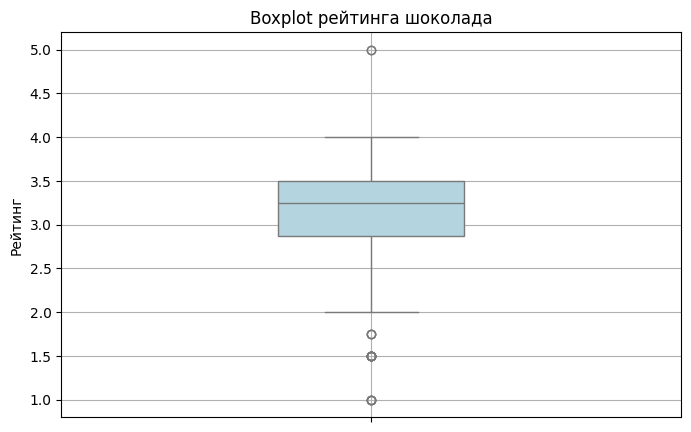

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ratings = data["Rating"]
Q1 = ratings.quantile(0.25)
Q3 = ratings.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(ratings < lower_bound) | (ratings > upper_bound)]

print("Анализ выбросов по рейтингу шоколада:")
print(f"Нижняя граница: {round(lower_bound, 2)}")
print(f"Верхняя граница: {round(upper_bound, 2)}")
print(f"Выбросов: {len(outliers)}")

plt.figure(figsize=(8, 5))
sns.boxplot(y=data["Rating"], color="lightblue", width=0.3)
plt.title("Boxplot рейтинга шоколада")
plt.ylabel("Рейтинг")
plt.grid(True)

plt.show()

Задача 4

**Рейтинг шоколада и содержание какао**

Нулевая гипотеза (H0): Средний рейтинг шоколада с содержанием какао 70% и выше **равен** среднему рейтингу шоколада с содержанием какао ниже 70%

Альтернативная гипотеза (H1): Средний рейтинг шоколада с содержанием какао 70% и выше **отличается** от среднего рейтинга шоколада с содержанием какао ниже 70%

Для проверки данной гипотезы можно использовать t-тест для независимых выборок или к. Манна-Уитни, так как сравниваются средние значения двух независимых групп (шоколад с содержанием какао 70% и выше/шоколад с содержанием какао ниже 70%). Для выбора подходящего метода проведем проверку на нормальность.



In [ ]:
import scipy.stats as stats

# Преобразование столбца с процентами какао в числовой формат
data['Cocoa\nPercent'] = data['Cocoa\nPercent'].astype(str).str.rstrip('%').astype(float)

# Фильтрация данных по содержанию какао
high_cocoa = data[data['Cocoa\nPercent'] >= 70]['Rating']
low_cocoa = data[data['Cocoa\nPercent'] < 70]['Rating']

# Проверка нормальности
shapiro_high = stats.shapiro(high_cocoa)
shapiro_low = stats.shapiro(low_cocoa)

print(f"Shapiro-Wilk test (high cocoa): W = {shapiro_high.statistic}, p = {shapiro_high.pvalue}")
print(f"Shapiro-Wilk test (low cocoa): W = {shapiro_low.statistic}, p = {shapiro_low.pvalue}")

alpha = 0.05
if shapiro_high.pvalue < alpha or shapiro_low.pvalue < alpha:
    print("Хотя бы одно распределение не является нормальным. Используем тест Манна-Уитни.")
    test_stat, p_value = stats.mannwhitneyu(high_cocoa, low_cocoa, alternative='two-sided')
else:
    print("Оба распределения нормальны. Используем T-тест.")
    test_stat, p_value = stats.ttest_ind(high_cocoa, low_cocoa)

print(f"Тест: статистика = {test_stat}, p-значение = {p_value}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние рейтинги различаются")
else:
    print("Не отвергаем нулевую гипотезу: средние рейтинги не различаются")


Shapiro-Wilk test (high cocoa): W = 0.9490966500642096, p = 3.981913676745924e-22
Shapiro-Wilk test (low cocoa): W = 0.9535331047020319, p = 1.1282847617904424e-08
Хотя бы одно распределение не является нормальным. Используем тест Манна-Уитни.
Тест: статистика = 240993.5, p-значение = 0.961407634195806
Не отвергаем нулевую гипотезу: средние рейтинги не различаются


**Зависимость между страной происхождения какао и рейтингом шоколада**

Нулевая гипотеза (H0): **Нет зависимости** между страной происхождения какао и рейтингом шоколада

Альтернативная гипотеза (H1): **Существует зависимость** между страной происхождения какао и рейтингом шоколада

Для проверки данной гипотезы мы можем использовать дисперсионный анализ для повторяющихся наблюдений (ANOVA), так как мы сравниваем средние значения рейтинга для нескольких повторяющихся групп странб, либо тест Крускала-Уоллиса, если распределение не нормальное.

In [ ]:
# Выберем топ-5 стран по количеству записей для большей репрезентативности данных
top_countries = data['Broad Bean\nOrigin'].value_counts().nlargest(5).index
filtered_data = data[data['Broad Bean\nOrigin'].isin(top_countries)]

normality_results = {}

print("Проверка нормальности распределения рейтингов для каждой страны:")
for country in top_countries:
    ratings = filtered_data[filtered_data['Broad Bean\nOrigin'] == country]['Rating']
    stat, p = stats.shapiro(ratings)
    normality_results[country] = p
    print(f"{country}: W = {stat:.4f}, p-value = {p:.4f}")

if any(p < 0.05 for p in normality_results.values()):
    print("\nХотя бы в одной группе распределение не является нормальным. Используем  тест Крускала-Уоллиса.")
    f_stat, p_value = stats.kruskal(*[filtered_data[filtered_data['Broad Bean\nOrigin'] == country]['Rating'] for country in top_countries])
else:
    print("\nВсе группы соответствуют нормальному распределению. Используем ANOVA.")
    f_stat, p_value = stats.f_oneway(*[filtered_data[filtered_data['Broad Bean\nOrigin'] == country]['Rating'] for country in top_countries])

print(f"\nСтатистика = {f_stat:.4f}, p-значение = {p_value:.4f}")

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: существует зависимость между страной происхождения и рейтингом.")
else:
    print("Не отвергаем нулевую гипотезу: зависимость между страной происхождения и рейтингом не обнаружена.")

Проверка нормальности распределения рейтингов для каждой страны:
Venezuela: W = 0.9596, p-value = 0.0000
Ecuador: W = 0.9288, p-value = 0.0000
Peru: W = 0.9598, p-value = 0.0001
Madagascar: W = 0.9439, p-value = 0.0000
Dominican Republic: W = 0.9393, p-value = 0.0000

Хотя бы в одной группе распределение не является нормальным. Используем  тест Крускала-Уоллиса.

Статистика = 7.7815, p-значение = 0.0999
Не отвергаем нулевую гипотезу: зависимость между страной происхождения и рейтингом не обнаружена.


In [ ]:
print(repr(data.columns.tolist()))


['Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType', 'Broad Bean\nOrigin']
